# Week 05: Basic Neural Network - Implementing Backpropagation Coding Assignment



## Part 1 

We will be implementing various types of methods needed to build a full neural network.






### Gradient Descent Optimizer and Loss Function

We will be working with regression problem in this assignment. So we will use batch gradient descent to iteratively optimize model parameters, as you have seen in previous weeks. We will use square loss function defined by:
$$ L(y, \hat{y}) = \frac{1}{2} (y-\hat{y})^2 $$

*i. implement the gradient descent optimizer `class GDOptimizer()` and quadratic loss function `class QuadraticCost()`. Fill in all #TODOS before moving on to next part.*

We first start by importing necessary libraries.

In [ ]:
# import necessary library and setup
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
# Gradient descent optimization
# The learning rate is specified by eta
class GDOptimizer(object):
    def __init__(self, eta):
        self.eta = eta

    def initialize(self, layers):
        pass

    # This function performs one gradient descent step
    # layers is a list of dense layers in the network
    # g is a list of gradients going into each layer before the nonlinear activation
    # a is a list of of the activations of each node in the previous layer going
    def update(self, layers, g, a):
        m = a[0].shape[1]
        for layer, curGrad, curA in zip(layers, g, a):
            layer.updateWeights(-self.eta / m * np.dot(curGrad, curA.T))
            layer.updateBias(-self.eta / m * np.sum(curGrad, 1).reshape(layer.b.shape))


# Cost function used to compute prediction errors
class QuadraticCost(object):

    # Compute the squared error between the prediction yp and the observation y
    # This method should compute the cost per element such that the output is the
    # same shape as y and yp
    @staticmethod
    def fx(y, yp):
        # TODO: your solution

    # Derivative of the cost function with respect to yp
    @staticmethod
    def dx(y, yp):
        # TODO: your solution




### Activation Function and Single Neural Network Layer

In this question you will implement 4 different activation functions: `SigmoidActivation`, `TanhActivation`, `ReLuActivation`, and `LinearActivation`. You will also need to take their derivatives.

*ii. 4 different activation functions. Fill in all blanks in code cells before moving on.*

In [ ]:
# Sigmoid function fully implemented as an example
class SigmoidActivation(object):
    @staticmethod
    def fx(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def dx(z):
        return SigmoidActivation.fx(z) * (1 - SigmoidActivation.fx(z))

# Hyperbolic tangent function
class TanhActivation(object):

    # Compute tanh for each element in the input z
    @staticmethod
    def fx(z):
        # TODO: your solution

    # Compute the derivative of the tanh function with respect to z
    @staticmethod
    def dx(z):
        # TODO: your solution


# Rectified linear unit
class ReLUActivation(object):
    @staticmethod
    def fx(z):
        # TODO: your solution

    @staticmethod
    def dx(z):
        # TODO: your solution


# Linear activation
class LinearActivation(object):
    @staticmethod
    def fx(z):
        # TODO: your solution

    @staticmethod
    def dx(z):
        # TODO: your solution


# This class represents a single hidden or output layer in the neural network
class DenseLayer(object):

    # numNodes: number of hidden units in the layer
    # activation: the activation function to use in this layer
    def __init__(self, numNodes, activation):
        self.numNodes = numNodes
        self.activation = activation

    def getNumNodes(self):
        return self.numNodes

    # Initialize the weight matrix of this layer based on the size of the matrix W
    def initialize(self, fanIn, scale=1.0):
        s = scale * np.sqrt(6.0 / (self.numNodes + fanIn))
        # TODO: your solution

    # Apply the activation function of the layer on the input z
    def a(self, z):
        # TODO: your solution


    # Compute the linear part of the layer
    # The input a is an n x k matrix where n is the number of samples
    # and k is the dimension of the previous layer (or the input to the network)
    def z(self, a):
        return self.W.dot(a) + self.b  # Note, this is implemented where we assume a is k x n

    # Compute the derivative of the layer's activation function with respect to z
    # where z is the output of the above function.
    # This derivative does not contain the derivative of the matrix multiplication
    # in the layer.  That part is computed below in the model class.
    def dx(self, z):
        # TODO: your solution

    # Update the weights of the layer by adding dW to the weights
    def updateWeights(self, dW):
        # TODO: your solution

    # Update the bias of the layer by adding db to the bias
    def updateBias(self, db):
        # TODO: your solution


IndentationError: ignored

### Neural Network Model

In this question, we will connect all previous pieces together and implement a full neural network. this is where forward pass and backpropagation comes. Be careful and take times to read through all comments we alreayd provided.

*iii. Implementing a model. Fill in blanks before you move on. Basically you will be mainly work on forward pass, which is about computing the loss, and backward propagation, which is about parameter updates.*

In [ ]:
# This class handles stacking layers together to form the completed neural network
class Model(object):

    # inputSize: the dimension of the inputs that go into the network
    def __init__(self, inputSize):
        self.layers = []
        self.inputSize = inputSize

    # Add a layer to the end of the network
    def addLayer(self, layer):
        self.layers.append(layer)

    # Get the output size of the layer at the given index
    def getLayerSize(self, index):
        if index >= len(self.layers):
            return self.layers[-1].getNumNodes()
        elif index < 0:
            return self.inputSize
        else:
            return self.layers[index].getNumNodes()

    # Initialize the weights of all of the layers in the network and set the cost
    # function to use for optimization
    def initialize(self, cost, initializeLayers=True):
        self.cost = cost
        if initializeLayers:
            for i in range(0, len(self.layers)):
                if i == len(self.layers) - 1:
                    self.layers[i].initialize(self.getLayerSize(i - 1))
                else:
                    self.layers[i].initialize(self.getLayerSize(i - 1))

    # Compute the output of the network given some input a
    # The matrix a has shape n x k where n is the number of samples and
    # k is the dimension
    # This function returns
    # yp - the output of the network
    # a - a list of inputs for each layer of the newtork where
    #     a[i] is the input to layer i
    # z - a list of values for each layer after evaluating layer.z(a) but
    #     before evaluating the nonlinear function for the layer
    def evaluate(self, x):
        curA = x.T
        a = [curA]
        z = []
        for layer in self.layers:
            z.append(layer.z(curA))
            curA = layer.a(z[-1])
            a.append(curA)
        yp = a.pop()
        return yp, a, z

    # Compute the output of the network given some input a
    # The matrix a has shape n x k where n is the number of samples and
    # k is the dimension
    def predict(self, a):
        a, _, _ = self.evaluate(a)
        return a.T

    # Train the network given the inputs x and the corresponding observations y
    # The network should be trained for numEpochs iterations using the supplied
    # optimizer
    def train(self, x, y, numEpochs, optimizer):

        # Initialize some stuff
        hist = []
        optimizer.initialize(self.layers)

        # Run for the specified number of epochs
        for epoch in range(0, numEpochs):

            # Feed forward
            # Save the output of each layer in the list a
            # After the network has been evaluated, a should contain the
            # input x and the output of each layer except for the last layer
            yp, a, z = self.evaluate(x)

            # Compute the error
            C = self.cost.fx(yp, y.T)
            d = self.cost.dx(yp, y.T)
            grad = []

            # Backpropogate the error
            idx = len(self.layers)
            for layer, curZ in zip(reversed(self.layers), reversed(z)):
                idx = idx - 1
                # Here, we compute dMSE/dz_i because in the update
                # function for the optimizer, we do not give it
                # the z values we compute from evaluating the network
                grad.insert(0, np.multiply(d, layer.dx(curZ)))
                d = np.dot(layer.W.T, grad[0])

            # Update the errors
            optimizer.update(self.layers, grad, a)

            # Compute the error at the end of the epoch
            yh = self.predict(x)
            C = self.cost.fx(yh, y)
            C = np.mean(C)
            hist.append(C)
        return hist

    def trainBatch(self, x, y, batchSize, numEpochs, optimizer):

        # Copy the data so that we don't affect the original one when shuffling
        x = x.copy()
        y = y.copy()
        hist = []
        n = x.shape[0]

        for epoch in np.arange(0, numEpochs):

            # Shuffle the data
            r = np.arange(0, x.shape[0])
            x = x[r, :]
            y = y[r, :]
            e = []

            # Split the data in chunks and run SGD
            for i in range(0, n, batchSize):
                end = min(i + batchSize, n)
                batchX = x[i:end, :]
                batchY = y[i:end, :]
                e += self.train(batchX, batchY, 1, optimizer)
            hist.append(np.mean(e))

        return hist


## Part 2

In this programming assignment, you will learn how to implement the backpropagation algorithm using concrete values and formulas from the basic principles of backpropagation and neural networks.

In the first part of this assignment, we will go through a basic example of implementing the backpropagation algorithm from start to finish. You will have to implement many of the helper functions and parts of the main algorithm. This part is derived from this blog post: https://www.anotsorandomwalk.com/backpropagation-example-with-numbers-step-by-step

The high level overview of the algorithm we will implement is:

1. Initialize weights for the parameters we want to train

2. Forward propagate through the network to get the output values

3. Define the error or cost function and its first derivatives

4. Backpropagate through the network to determine the error derivatives

5. Update the parameter estimates using the error derivative and the current value

For this part of the assignment, we will be using a simple neural network with three input neurons, one hidden layer with two neurons, and an output layer with two neurons.

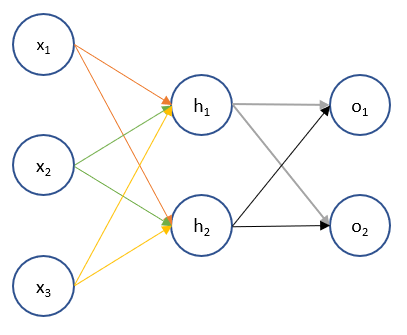

We will first initialize the parameters that we will use. The input and target values for this problem are $x_1=1$, $x_2=4$, $x_3=5$ and $t_1=0.1$, $t_2=0.05$.

We initialize the weights as shown in the diagram below. In general, you should assign them randomly, but for the purposes of this assignment we will use these numbers. You do not have to do anything for this part other than run the cell below.

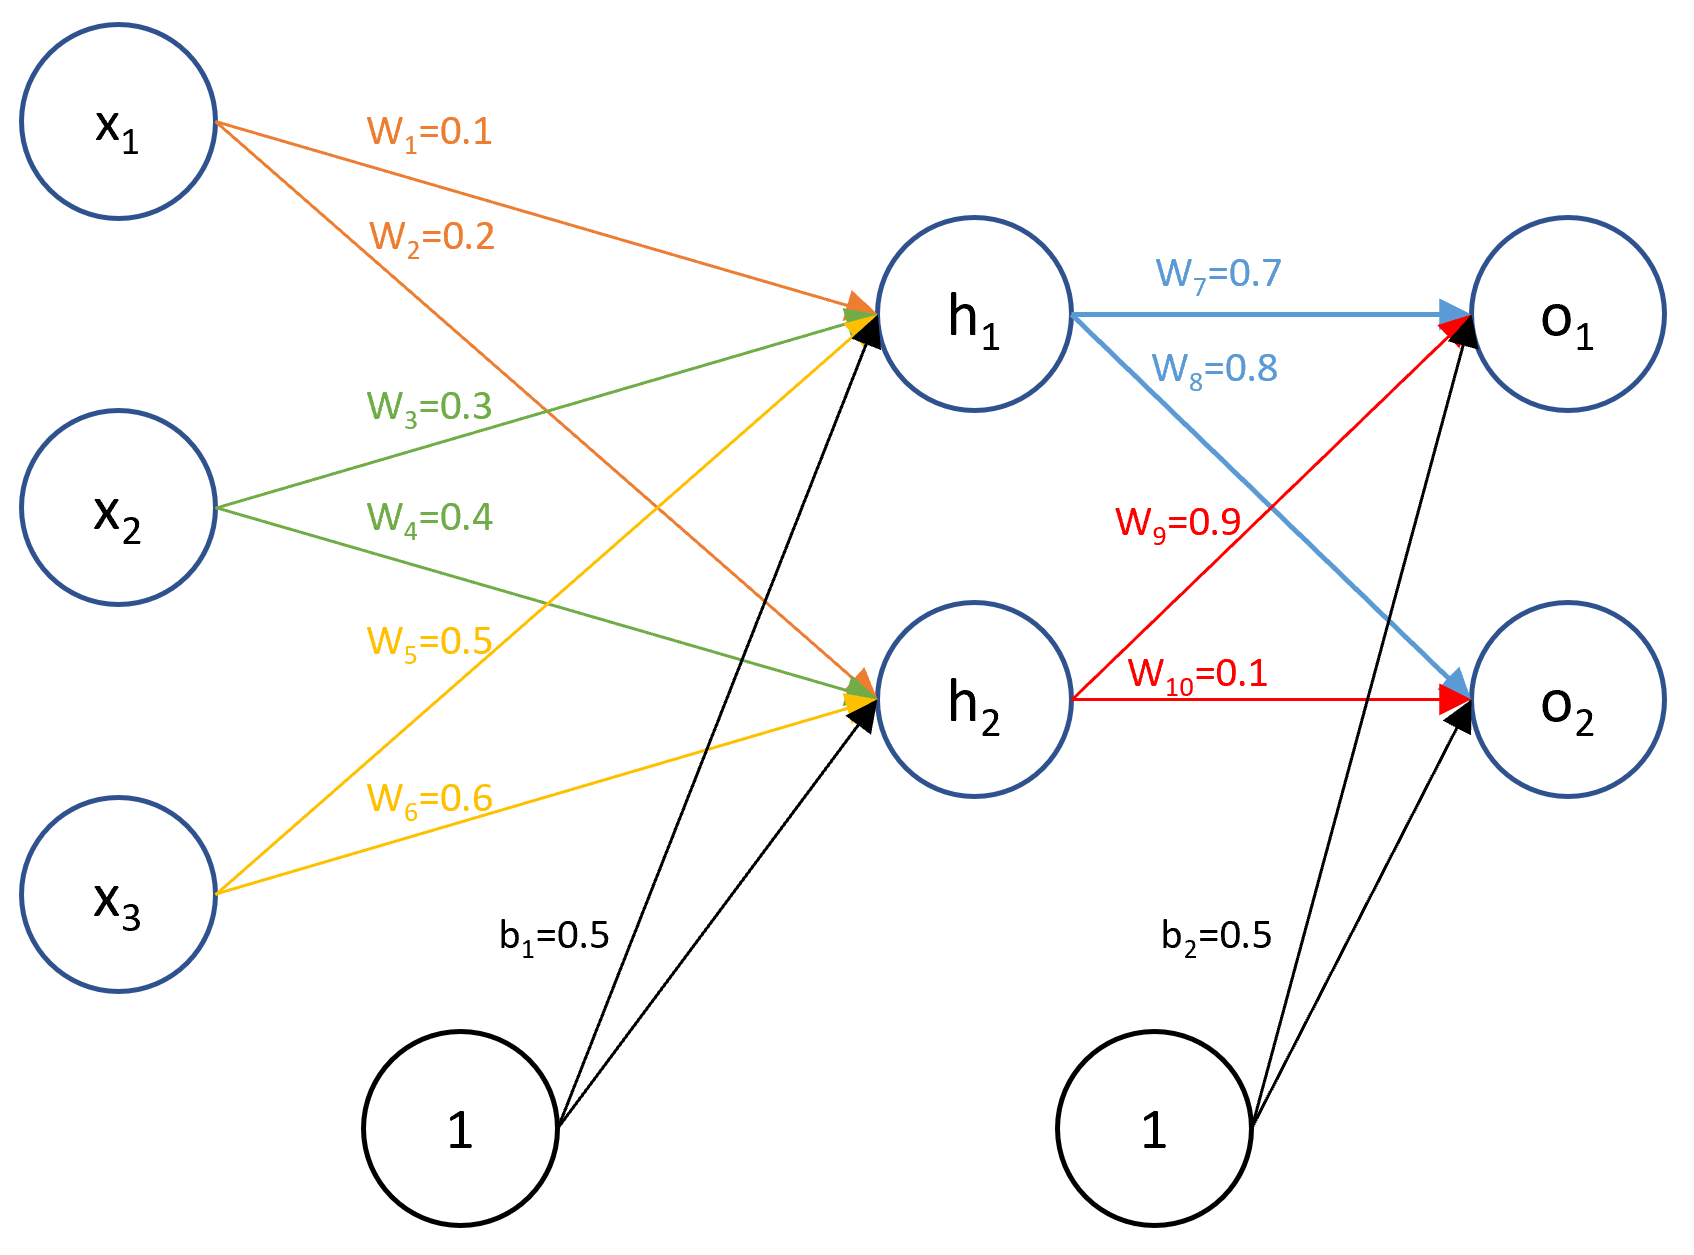

In [ ]:
numIter = 10000

# Initialize Variables
w1 = 0.1
w2 = 0.2
w3 = 0.3
w4 = 0.4
w5 = 0.5
w6 = 0.6
w7 = 0.7
w8 = 0.8
w9 = 0.9
w10 = 0.1
wList = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10]

b1 = 0.5
b2 = 0.5
bList = [b1, b2]

# Input and Target values
x1 = 1
x2 = 4
x3 = 5
xList = [x1, x2, x3]

t1 = 0.1
t2 = 0.05
tList = [t1, t2]

# set learning rate
alpha = 0.01

We now define the forward propagation function that we will use to forward propagate throughout the network. For the input and output layer, we will use $z_{h_1}, z_{h_2}, z_{o_1},$ and $z_{o_2}$ to denote the value before the activation function is applied and the notation of $h_1, h_2, o_1,$ and $o_2$ to denote the values after application of the activation function. 

The forward propagation function is as follows:

Input to hidden layer

$w_1x_1+w_3x_2+w_5x_3+b_1=z_{h_1}$

$w_2x_1+w_4x_2+w_6x_3+b_1=z_{h_2}$

$h_1=\sigma(z_{h_1})$

$h_2=\sigma(z_{h_2})$

Hidden layer to output layer

$w_7h_1 + w_9h_2 + b_2=z_{o_1}$

$w_8h_1 + w_{10}h_2 + b_2=z_{o_2}$

$o_1=\sigma(z_{o_1})$

$o_2=\sigma(z_{o_2})$

It is up to you to implement the function given this information. You can use the sigmoid activation function you implemented in part 1.

In [ ]:
def forwardProp(xList, wList, bList):
  # TODO: your solution

Now, we define the sum of squares error using the target values and the results from the last layer from forward propagation.

$E = \frac{1}{2}[(o_1-t_1)^2+(o_2-t_2)^2]$

Use this information to implement the error function.

In [ ]:
def error(oList, tList):
  # TODO: your solution

Now we will piece everything together and construct the backpropagation algorithm that will backpropagate through the network to compute all the error derivatives with respect to the parameters. It is mostly filled out for you, but you will need to implement the derivative calculations.

To assist you in this process, here are some starting information that can help you. You will need to use the derivative of the sigmoid function so make sure you know how to calculate that. Also, given that $w_7h_1 + w_9h_2 + b_2=z_{o_1}$ and $w_8h_1 + w_{10}h_2 + b_2=z_{o_2}$, we have $\frac{dz_{o_1}}{dw_7} = h_1, \frac{dz_{o_2}}{dw_8} = h_1, \frac{dz_{o_1}}{dw_9} = h_2, \frac{dz_{o_2}}{dw_{10}} = h_2, \frac{dz_{o_1}}{db_2} = 1,$ and $\frac{dz_{o_2}}{db_2} = 1.$ Also, here is the derivative of E with respect to $o_1$ and $o_2$: $\frac{dE}{d_{o_1}} = o_1 - t_1$, $\frac{dE}{d_{o_2}} = o_2 - t_2$

You will need to derive the derivatives for connecting the hidden layer to the output layer: derivatives of the error with respect to $w_7$, $w_8$, $w_9$, $w_{10}$, and $b_2$, as well as derivatives for connecting the input layer to the hidden layer, derivatives of the error with respect to $w_1$, $w_2$, $w_3$, $w_4$, $w_5$, $w_6$, and $b_1$. 

First derive the expressions for the derivatives on paper, it will be much easier to see the relationships. To find them, you should take partial derivatives of the error equation in the previous cell. You can find equations for the terms found in the error equation in previous steps, and as you can imagine, this will involve heavy application of the chain rule. It may seem long and complicated, but do not worry too much; we are only using the basic principles of calculus.

Then, translate these derivative expressions into code in the cell below. You can make use of predefined terms as well as derivatives that are defined earlier for your derivative expressions. The ordering of the derivatives in the code are already set such that later derivatives depend on previous ones.

When you are done, run the cell, and if everything is done correctly you should see the algorithm working!

In [ ]:
errList = []
for i in range(numIter):
  # Forward propagation
  h1, h2, o1, o2 = forwardProp(xList, wList, bList)

  # Compute error
  sse = error([o1, o2], tList)
  errList.append(sse)

  print('Running ' + str(i + 1) + ' of ' + str(numIter))
  print('o1: ' + str(o1))
  print('t1: ' + str(t1))
  print('o2: ' + str(o2))
  print('t2: ' + str(t2))
  print('error: ' + str(sse))
  print('')
  
  # Error derivative calculations
  # Compute dE_dw7
  dE_dw7 = # TODO: your solution
  # Compute dE_dw8
  dE_dw8 = # TODO: your solution
  # Compute dE_dw9
  dE_dw9 = # TODO: your solution
  # Compute dE_dw10
  dE_dw10 = # TODO: your solution
  # Compute dE_db2
  dE_db2 = # TODO: your solution
  # Compute dE_dh1 first
  dE_dh1 = # TODO: your solution
  # Compute dE_dw1
  dE_dw1 = # TODO: your solution
  # Compute dE_dw3
  dE_dw3 = # TODO: your solution
  # Compute dE_dw5
  dE_dw5 = # TODO: your solution
  # Compute dE_dh2 first
  dE_dh2 = # TODO: your solution
  # Compute dE_dw2
  dE_dw2 = # TODO: your solution
  # Compute dE_dw4
  dE_dw4 = # TODO: your solution
  # Compute dE_dw6
  dE_dw6 = # TODO: your solution
  # Compute dE_db1
  dE_db1 = # TODO: your solution
  # Update all parameters
  w1 = w1 - alpha * dE_dw1
  w2 = w2 - alpha * dE_dw2
  w3 = w3 - alpha * dE_dw3
  w4 = w4 - alpha * dE_dw4
  w5 = w5 - alpha * dE_dw5
  w6 = w6 - alpha * dE_dw6
  w7 = w7 - alpha * dE_dw7
  w8 = w8 - alpha * dE_dw8
  w9 = w9 - alpha * dE_dw9
  w10 = w10 - alpha * dE_dw10
  b1 = b1 - alpha * dE_db1
  b2 = b2 - alpha * dE_db2
  wList = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10]
  bList = [b1, b2]

Now you want to verify that your backpropagation algorithm works by visualization. Plot value of loss at each iteration with respect to number of iterations. 

**Describe what you have observed. Does your observations match your expectations based on theories?**

In [ ]:
pd.DataFrame(errList, columns=['SSE']).plot()

## Part 3

In this part, we will use the neural network model you just implemented in part 1 to solve a regression problem from real world dataset. We will work with "Boston Housing Prices" dataset from sklearn library.

### Import library and setup

**Load dataset from sklearn library, you should find [this link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) useful. Then do train test split on the given dataset with test size of 0.2.**

In [ ]:
# import library and dataset
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

# import train test split
from sklearn.model_selection import train_test_split

# TODO: train test split
X_train, X_test, y_train, y_test = ...

### Build a Linear Rregession Baseline Model

As you have seen in previous weeks, linear regression model is the most fundamental model to solve regression problem. Here, we want to first build a linear regression model as baseline model. Observe its training and test accuracy, and see where we can improve our prediction.

**Use sklearn library to implement a linear regression model on boston housing prices dataset. Report training and test set mean squared error. Does linear regression model perform well in this context? You don't have to perform cross validation.**

In [ ]:
from sklearn.linear_model import LinearRegression

# initialize and train a linear regression model
# TODO:
linear_model = ...
...

In [ ]:
# report training MSE
# TODO:
train_pred = ...
print("Linear Regression Model Training MSE:", ...)

In [ ]:
# report test MSE
# TODO:
test_pred = ...
print("Linear Regression Model Test MSE:", ...)

### Build a Neural Network Model

We further want to improve our prediction accuracy in regression problem. Now we have the tool of neural network. Use all classes that you implemented in part 1, construct a simple neural network as following:

* First layer has 30 neurons using Relu activation. 
* Second layer has 25 neurons using Tanh activation.

* Third layer uses Linear activation and goes directly to output layer.

In [ ]:
# TODO: set up input_num and output_num
imput_num = ...
output_num = ... # since we are working with a regression problem with scalar output

In [ ]:
# Set up a neural network.
# TODO:
nn_model = ...
...
nn_model.initialize(...)

In [ ]:
# TODO: train neural network
# it should output value of loss with respect to each iteration 
nn_loss = nn_model.train(X_train, y_train, 1000, ...)

**Now plot value of quadratic loss with respect to each iteration. Compare your result with your plot in part 2. Do they look the same?**

In [ ]:
import seaborn as sns

# TODO
...

**Now compute MSE on training and test set. Compare with MSE of linear rergession model.**

In [ ]:
# report training MSE
# TODO:
nn_train_pred = ...
print("Neural Network Model Training MSE:", ...)

In [ ]:
# report test MSE
# TODO:
nn_test_pred = ...
print("Neural Network Model Test MSE:", ...)

Hopefully you found this assignment fun and enlightening, and you now have a deeper understanding of backpropagation than you did before!

#### References

[1] https://www.anotsorandomwalk.com/backpropagation-example-with-numbers-step-by-step/ 